In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv("movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.shape # we have 5043 rows and 28 columns

(5043, 28)

In [4]:
data.columns  # column names

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Here,a lot of columns are containing null values. Here the titile_year column can play a important roll in arranging the data
. So we will use titile_year column for the operations

In [6]:
# getting the null values snapshot after sorting the data
data = data.sort_values(by='title_year', ascending=True)

In [7]:
data.index = data.index.sort_values(ascending=True)
data.head() # now the data has been shuffeled 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Black and White,D.W. Griffith,69.0,123.0,204.0,9.0,Mae Marsh,436.0,NaN,Drama|History|War,...,88.0,NaN,USA,Not Rated,385907.0,1916.0,22.0,8.0,1.33,691
1,Black and White,Harry F. Millarde,1.0,110.0,0.0,0.0,Johnnie Walker,2.0,3000000.0,Crime|Drama,...,1.0,NaN,USA,NaN,100000.0,1920.0,2.0,4.8,1.33,0
2,Black and White,King Vidor,48.0,151.0,54.0,6.0,Renée Adorée,81.0,NaN,Drama|Romance|War,...,45.0,NaN,USA,Not Rated,245000.0,1925.0,12.0,8.3,1.33,226
3,Black and White,Fritz Lang,260.0,145.0,756.0,18.0,Gustav Fröhlich,136.0,26435.0,Drama|Sci-Fi,...,413.0,German,Germany,Not Rated,6000000.0,1927.0,23.0,8.3,1.33,12000
4,Black and White,Harry Beaumont,36.0,100.0,4.0,4.0,Bessie Love,77.0,2808000.0,Musical|Romance,...,71.0,English,USA,Passed,379000.0,1929.0,28.0,6.3,1.37,167


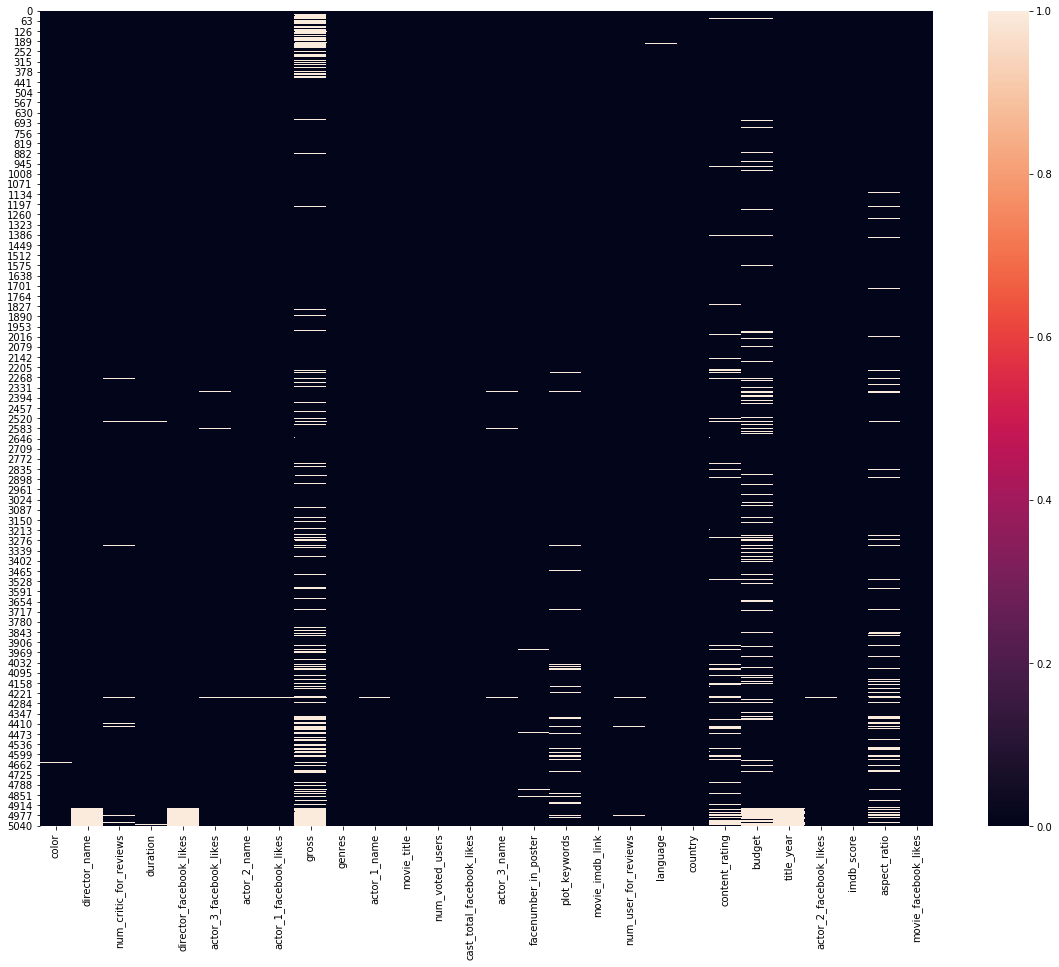

In [8]:
# getting the heatmap snapshot of null values
rcParams['figure.figsize'] = 20,15
sns.heatmap(data.isnull())

These white lines are representing the nulll values in the corresponding column.
Here we can see the the are contiue missing values in the titile_year columns after a particular index.

In [9]:
data.title_year.isnull().sum() # total number of null values

108

In [10]:
title_null_index = data.title_year.isnull()

In [11]:
f_null = title_null_index[title_null_index==True].index[0]
l_null = title_null_index[title_null_index==True].index[-1]

In [12]:
title_null_index = data.title_year.isnull()
print("first null index :", f_null,"and value :", data.title_year[f_null-1])
print("last null index: ", l_null, "and value :", data.title_year[l_null])

first null index : 4935 and value : 2016.0
last null index:  5042 and value : nan


We allready sort the data by titile_year in ascending order and values are missing after year 2016
We can randomaly assign the year from 2015 to 2019.

In [13]:
data['title_year'][4935:] = np.random.randint(2016,2019,108)

C:\Users\amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


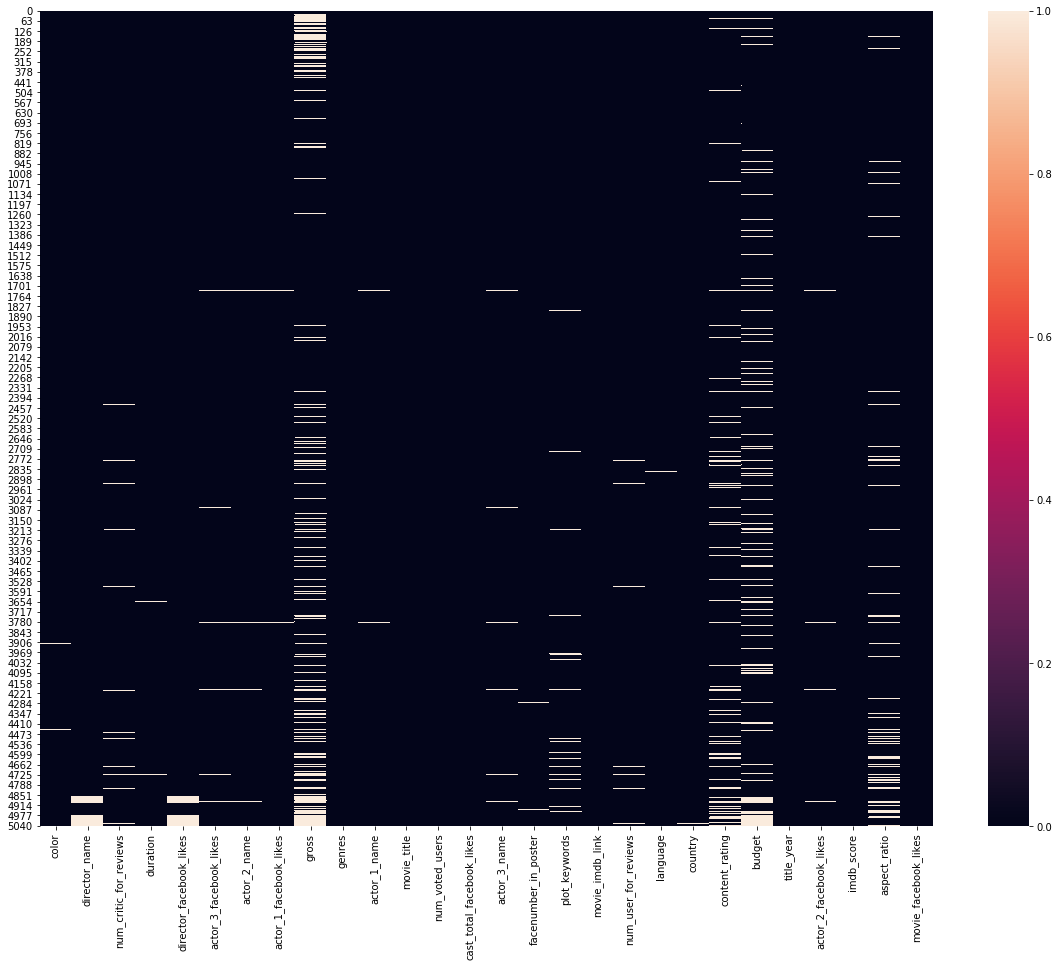

In [14]:
# again checking heatmap
data = data.sort_values(by='title_year', ascending=True)
data.index = data.index.sort_values(ascending=True)

rcParams['figure.figsize'] = 20,15
sns.heatmap(data.isnull())

In [15]:
color_series = data.color.fillna(method='bfill')

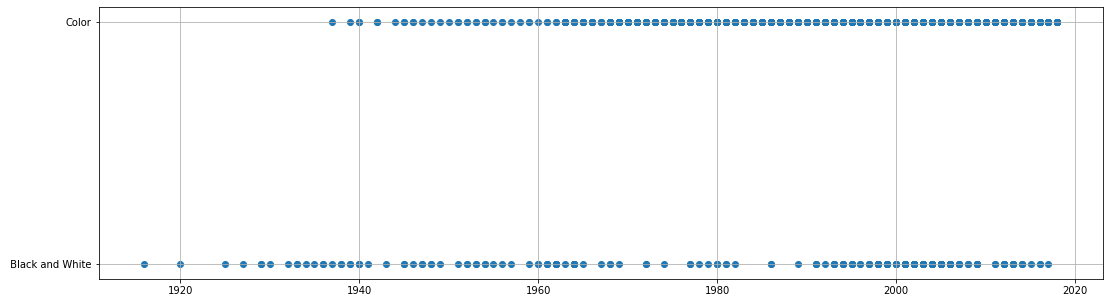

In [16]:
plt.figure(figsize=(18,5))
plt.grid()
plt.scatter(x=data.title_year, y=color_series)
plt.show()

According to this plot we can say that color movies was started near about 1935-37 and black & white movies
are continuously in the market

# Hypo_1: The black&white movies are in the market for a particular time period
result: The hypothesis was wrong and the black&white movies are continuously in the market.

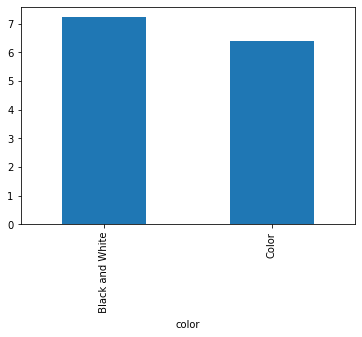

In [17]:
data.groupby('color')['imdb_score'].mean().plot(kind='bar', figsize=(6,4));

## Hypo_2: Color movies have better imdb_score then black&white
result: Color movies does not have better imdb_score. (there are not much difference between score of the movies)

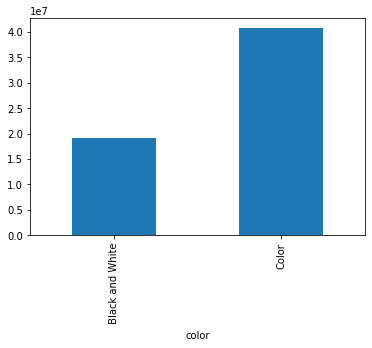

In [18]:
data.groupby(by='color')['budget'].mean().plot(kind='bar', figsize=(6,4))

## Hypo_3: The color movies have more budget then black&white
Result: Hypotheis is right, the color movies have double budget then black&white.

In [19]:
def rating_mapper(value):
    if value >=9.0 and value <=10.0:
        return 'best_rating'
    elif value >=7.5 and value <9.0:
        return 'better_rating'
    elif value >=6.0 and value <7.5:
        return 'good_rating'
    elif value >=5.0 and value <6.0:
        return 'normal_rating'
    elif value <5:
        return 'poor_rating'
    else:
        return None

In [20]:
# creating a categorical column for the imdb_score
data['rating_class'] = data['imdb_score'].apply(lambda x:rating_mapper(x))
data['rating_class'].value_counts()

good_rating      2702
normal_rating     972
better_rating     878
poor_rating       482
best_rating         9
Name: rating_class, dtype: int64

In [21]:
# here we can see that 'best_rating' class has only 9 values which is very less
# we can aggregate these into 'better_rating'
def change_rating_class(rating):
    if rating=='best_rating':
        return 'better_rating'
    else:
        return rating
data['rating_class'] = data['rating_class'].apply(lambda x: change_rating_class(x))
data['rating_class'].value_counts()

good_rating      2702
normal_rating     972
better_rating     887
poor_rating       482
Name: rating_class, dtype: int64

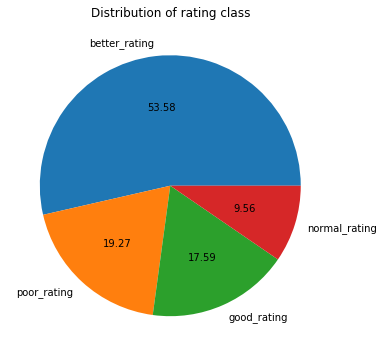

In [22]:
plt.figure(figsize=(6,6))
plt.pie(data['rating_class'].value_counts(), labels=data['rating_class'].unique(),autopct='%.2f')
plt.title("Distribution of rating class")
plt.show();

Here we can say that the film idustry is capable to produce better moveis and liked by audience more than 50%.

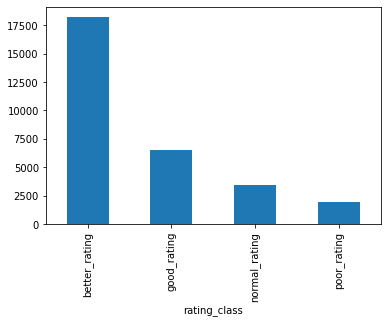

In [23]:
data.groupby(['rating_class'])['movie_facebook_likes'].mean().plot(kind='bar', figsize=(6,4));

# Hypo_4: imdb_score(in terms of rating_class) will be more if the movie gets more 'movie_facebook_likes'.
Result: The hypothesis is right, the imdb_score is exponentially perpotional to facebook_likes.

In [24]:
categorical_df = data.select_dtypes(include='object')
print(categorical_df.shape)
categorical_df.head()

(5043, 13)


,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,rating_class
0,Black and White,D.W. Griffith,Mae Marsh,Drama|History|War,Lillian Gish,Intolerance: Love's Struggle Throughout the Ages,Walter Long,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,NaN,USA,Not Rated,better_rating
1,Black and White,Harry F. Millarde,Johnnie Walker,Crime|Drama,Stephen Carr,Over the Hill to the Poorhouse,Mary Carr,family relationships|gang|idler|poorhouse|thief,http://www.imdb.com/title/tt0011549/?ref_=fn_t...,NaN,USA,NaN,poor_rating
2,Black and White,King Vidor,Renée Adorée,Drama|Romance|War,John Gilbert,The Big Parade,Claire Adams,chewing gum|climbing a tree|france|translation...,http://www.imdb.com/title/tt0015624/?ref_=fn_t...,NaN,USA,Not Rated,better_rating
3,Black and White,Fritz Lang,Gustav Fröhlich,Drama|Sci-Fi,Brigitte Helm,Metropolis,Rudolf Klein-Rogge,art deco|bible quote|dance|silent film|worker,http://www.imdb.com/title/tt0017136/?ref_=fn_t...,German,Germany,Not Rated,better_rating
4,Black and White,Harry Beaumont,Bessie Love,Musical|Romance,Anita Page,The Broadway Melody,Charles King,sibling rivalry|singer|sister act|whistling|wi...,http://www.imdb.com/title/tt0019729/?ref_=fn_t...,English,USA,Passed,good_rating


In [25]:
numeric_df = data.select_dtypes(exclude='object')
print(numeric_df.shape)
numeric_df.head()

(5043, 16)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,69.0,123.0,204.0,9.0,436.0,NaN,10718,481,1.0,88.0,385907.0,1916.0,22.0,8.0,1.33,691
1,1.0,110.0,0.0,0.0,2.0,3000000.0,5,4,1.0,1.0,100000.0,1920.0,2.0,4.8,1.33,0
2,48.0,151.0,54.0,6.0,81.0,NaN,4849,108,0.0,45.0,245000.0,1925.0,12.0,8.3,1.33,226
3,260.0,145.0,756.0,18.0,136.0,26435.0,111841,203,1.0,413.0,6000000.0,1927.0,23.0,8.3,1.33,12000
4,36.0,100.0,4.0,4.0,77.0,2808000.0,4546,109,8.0,71.0,379000.0,1929.0,28.0,6.3,1.37,167


In [26]:
numeric_df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [27]:
likes_cols = ['actor_1_facebook_likes','actor_2_facebook_likes', 'actor_3_facebook_likes',
              'director_facebook_likes', 'movie_facebook_likes', 'cast_total_facebook_likes',
              'num_voted_users','facenumber_in_poster', 'num_user_for_reviews',
              'num_critic_for_reviews', 'duration',  'aspect_ratio']
len(likes_cols)

12

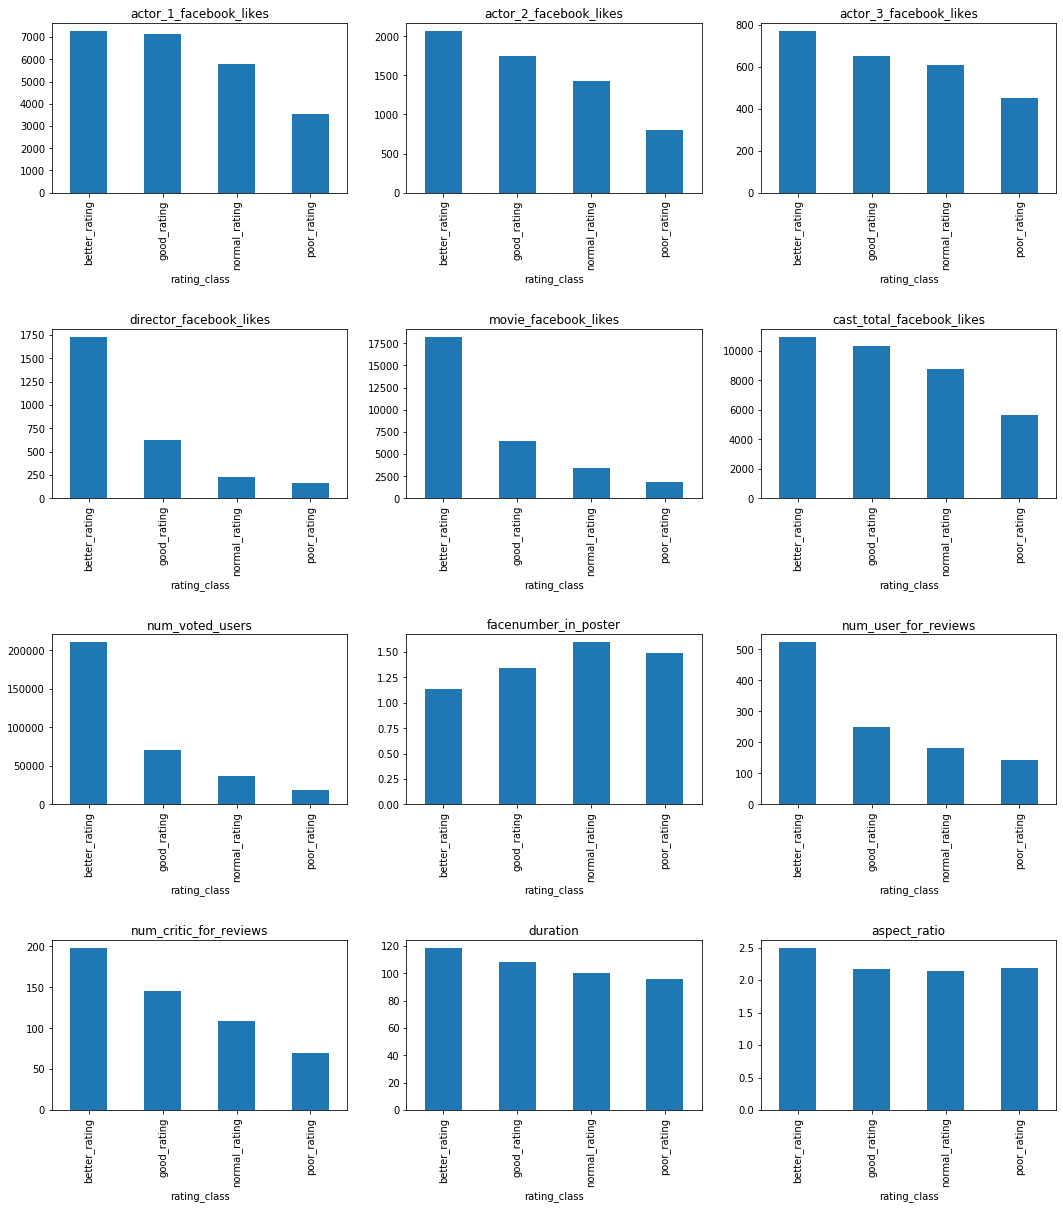

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3)
i = 1
for col in likes_cols:
    plt.subplot(4,3,i)
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    i+=1
    data.groupby(['rating_class'])[col].mean().plot(kind='bar', title=col,figsize=(18,20))


## Hypo_5: If the actors get the more like on facebook post, then the movie will also get good rating.
Result: In the first row of the figure, We can see the number of likes and rating are positively related, which will be confirmed by the correlation.
    
# Hypo_6: If a particular movie gets a high number of reviews then it will get high rating.
Result: According to all three review type distribution the hypothesis is right.
    
But the face_number in the poster shows that audience like the movies which has less or only lead actors in the cast.

And the duration aspect ratio dose not play a important roll.

In [29]:
# correlation matrix
corr = numeric_df.corr()['imdb_score'].sort_values(ascending=False)
corr

imdb_score                   1.000000
num_voted_users              0.410965
num_critic_for_reviews       0.305303
num_user_for_reviews         0.292475
duration                     0.261662
movie_facebook_likes         0.247049
gross                        0.198021
director_facebook_likes      0.170802
cast_total_facebook_likes    0.085787
actor_2_facebook_likes       0.083808
actor_1_facebook_likes       0.076099
aspect_ratio                 0.059445
actor_3_facebook_likes       0.052633
budget                       0.030688
facenumber_in_poster        -0.062958
title_year                  -0.177536
Name: imdb_score, dtype: float64

In [30]:
rcParams['figure.figsize'] = 6,6


In [31]:
cate_cols = categorical_df.columns # [x for x in data.columns if data.dtypes[x]=='object']
cate_cols

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating', 'rating_class'],
      dtype='object')

In [32]:
for col in cate_cols:
    print(categorical_df[col].nunique(), "total values: ", len(categorical_df[col].dropna()), col)

2 total values:  5024 color
2398 total values:  4939 director_name
3032 total values:  5030 actor_2_name
914 total values:  5043 genres
2097 total values:  5036 actor_1_name
4917 total values:  5043 movie_title
3521 total values:  5020 actor_3_name
4760 total values:  4890 plot_keywords
4919 total values:  5043 movie_imdb_link
47 total values:  5031 language
65 total values:  5038 country
18 total values:  4740 content_rating
4 total values:  5043 rating_class


In [33]:
dir_df = data.director_name.value_counts()
dir_df

Steven Spielberg          26
Woody Allen               22
Martin Scorsese           20
Clint Eastwood            20
Ridley Scott              17
Tim Burton                16
Steven Soderbergh         16
Spike Lee                 16
Renny Harlin              15
Oliver Stone              14
Sam Raimi                 13
Robert Rodriguez          13
Barry Levinson            13
Ron Howard                13
Joel Schumacher           13
John Carpenter            13
Robert Zemeckis           13
Michael Bay               13
Wes Craven                12
Brian De Palma            12
Tony Scott                12
Shawn Levy                12
Peter Jackson             12
Kevin Smith               12
Richard Donner            12
Stephen Frears            11
Rob Reiner                11
Richard Linklater         11
Chris Columbus            11
Francis Ford Coppola      11
                          ..
Roger Christian            1
Kevin Tenney               1
Gregory Nava               1
Benedek Fliega

In [34]:
dir_df[:10] # top 10 director in terms of total number of movies

Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

In [35]:
dir_mapper = {'Steven Spielberg&other':dir_df.index.values[:3], "Ridley Scott&other":dir_df.index.values[3:10],
              'Robert Zemeckis&other':dir_df.index.values[10:31], "John McTiernan&other":dir_df.index.values[31:105],
              'Tom Tykwer&other' :dir_df.index.values[105:]}

In [36]:
def update_director(name):
    for key in dir_mapper.keys():
        if name in dir_mapper[key]:
            return key
    else:
        return name

In [37]:
categorical_df['updated_director_name'] = categorical_df['director_name'].apply(lambda x: update_director(x))

C:\Users\amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
categorical_df['updated_director_name'].value_counts()

Tom Tykwer&other          3921
John McTiernan&other       582
Robert Zemeckis&other      254
Ridley Scott&other         114
Steven Spielberg&other      68
Name: updated_director_name, dtype: int64

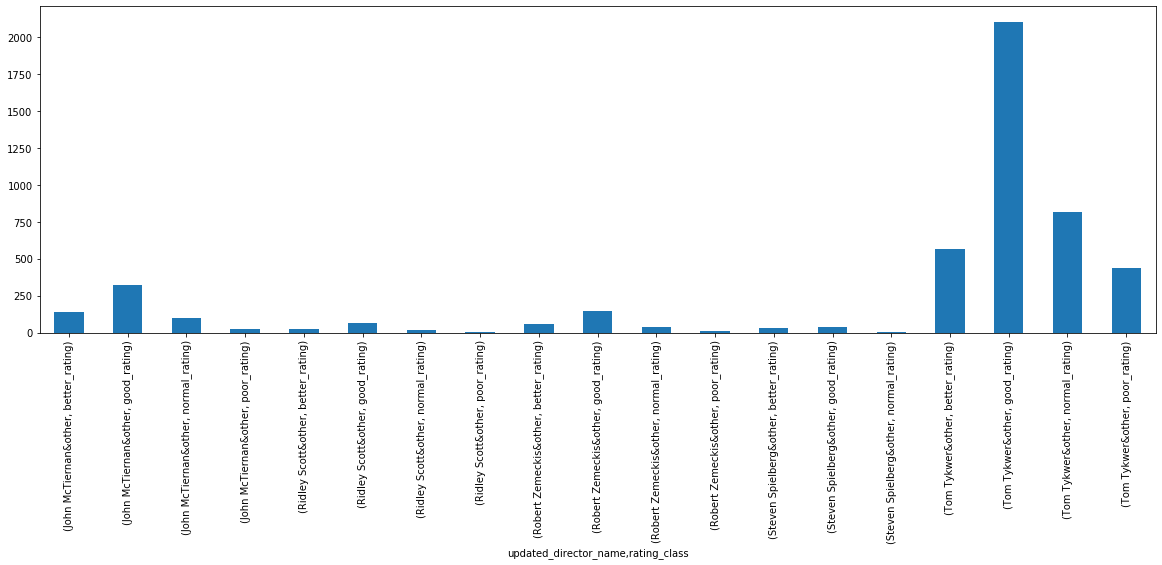

In [39]:
categorical_df.groupby(['updated_director_name','rating_class'])['rating_class'].count().plot(kind='bar', figsize=(20,6))

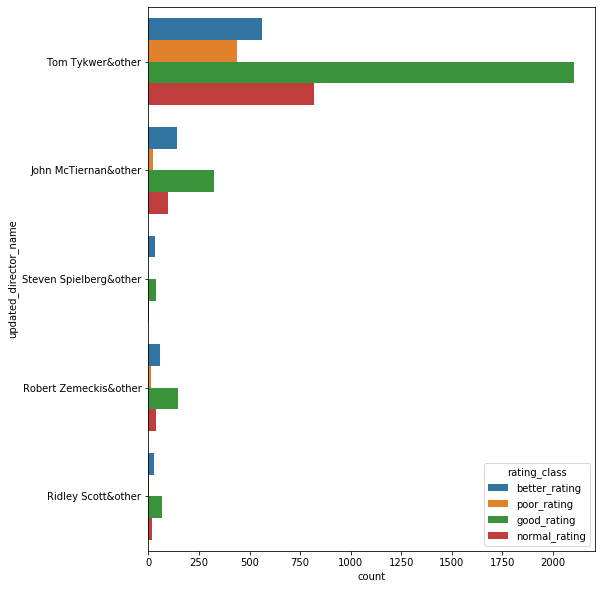

In [40]:
rcParams['figure.figsize'] = 8,10
sns.countplot(y='updated_director_name', hue='rating_class', data=categorical_df)

The group of "Tom Tykwer&other" produced the highest number of good rating movies.

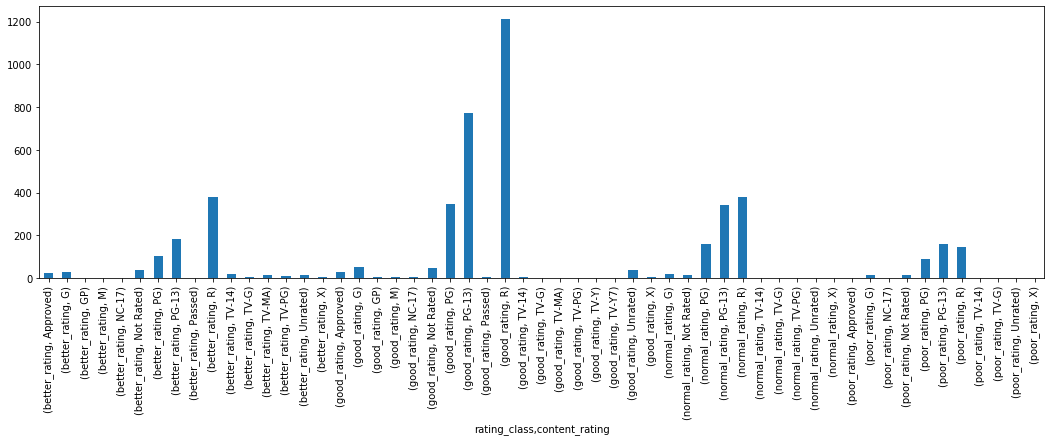

In [41]:
data.groupby(['rating_class','content_rating'])['content_rating'].count().plot(kind='bar', figsize=(18,5));

In [42]:
data.content_rating.unique()

array(['Not Rated', nan, 'Passed', 'Unrated', 'Approved', 'G', 'PG', 'R',
       'PG-13', 'TV-G', 'M', 'GP', 'X', 'NC-17', 'TV-PG', 'TV-14',
       'TV-MA', 'TV-Y', 'TV-Y7'], dtype=object)

In [43]:
data.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [44]:
def update_content_rating(value):
    value = str(value)
    if value.split("-")[0] =='TV':
        return 'TV'
    elif value.split("-")[0]=='PG':
        return 'PG'
    elif value=='Unrated':
        return 'Not Rated'
    elif value =='Passed':
        return 'Approved'
    elif value in ['X', 'NC-17','GP', 'M', 'nan']:
        return 'M'
    else:
        return value

In [45]:
categorical_df['updated_content_rating'] = categorical_df['content_rating'].apply(lambda x: update_content_rating(x))

C:\Users\amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
categorical_df.updated_content_rating.value_counts()

PG           2162
R            2118
M             334
Not Rated     178
G             112
TV             75
Approved       64
Name: updated_content_rating, dtype: int64

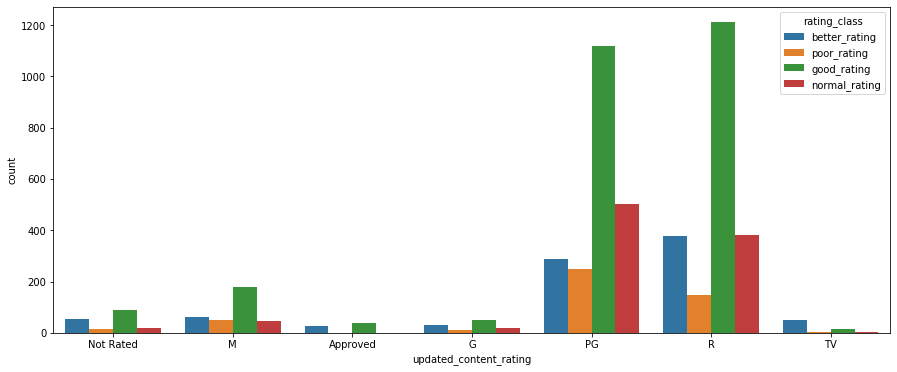

In [47]:
rcParams['figure.figsize'] = 15,6
sns.countplot(x='updated_content_rating', hue='rating_class', data=categorical_df)

The largest number of movies are related to R and PG content_rating category in good_rating class.

In [48]:
data.language.unique()
print(data.language.nunique())

47


In [49]:
data.language.value_counts(ascending=False)[:10]

English      4704
French         73
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       18
Russian        11
Italian        11
Cantonese      11
Name: language, dtype: int64

About 90% movies have English language on imdb

In [50]:
def update_language(x):
    if x not in ['English', 'French','Spanish', 'Hindi', 'Mandarin', 'German', 'Japanese', 'Russian', 'Cantonese', 'Italian']:
        return 'other_language'
    else:
        return x

In [51]:
categorical_df['update_language'] = categorical_df['language'].apply(lambda x: update_language(x))

C:\Users\amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
categorical_df['update_language'].value_counts()

English           4704
other_language     102
French              73
Spanish             40
Hindi               28
Mandarin            26
German              19
Japanese            18
Italian             11
Cantonese           11
Russian             11
Name: update_language, dtype: int64

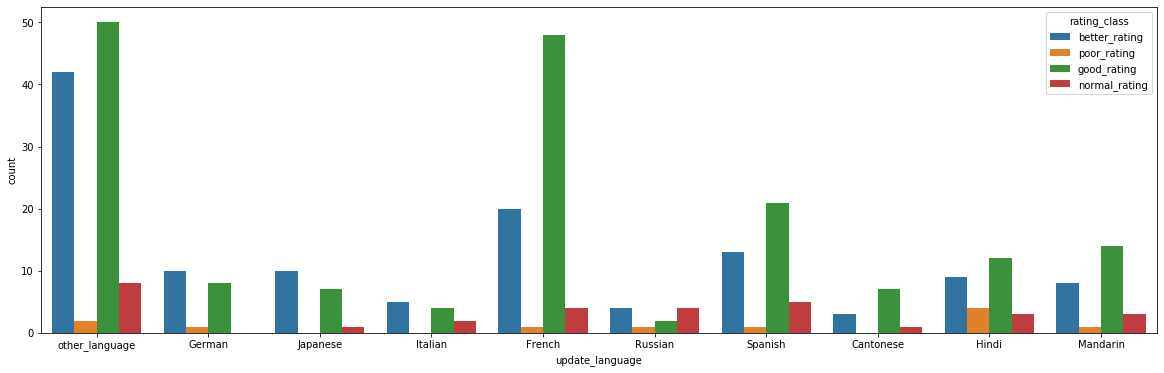

In [53]:
rcParams['figure.figsize'] = 20,6
langu_df = categorical_df[categorical_df['update_language'] !='English']
sns.countplot(x='update_language', hue='rating_class', data=langu_df)

In [54]:
categorical_df['country'].value_counts()[:20]

USA            3807
UK              448
France          154
Canada          126
Germany          97
Australia        55
India            34
Spain            33
China            30
Italy            23
Japan            23
Mexico           17
Hong Kong        17
New Zealand      15
South Korea      14
Ireland          12
Russia           11
Denmark          11
Norway            8
Brazil            8
Name: country, dtype: int64

In [55]:
country_list = categorical_df['country'].value_counts()[:15].index.values

In [56]:
def update_country(x):
    if x not in country_list:
        return 'other_country'
    else:
        return x

In [57]:
categorical_df['update_country'] = categorical_df['country'].apply(lambda x: update_country(x))

C:\Users\amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


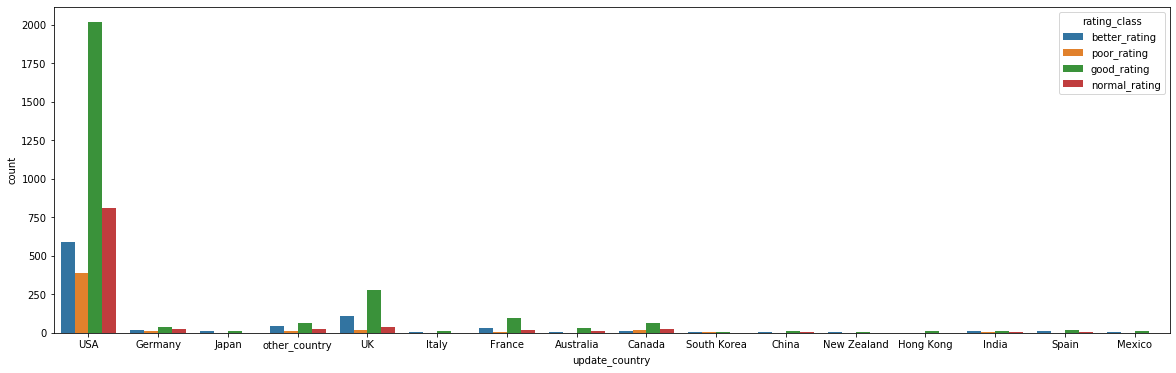

In [58]:
sns.countplot(x='update_country', hue='rating_class', data=categorical_df)

USA has a highest number of movies on imdb with good rating

In [59]:
updated_data = pd.concat([categorical_df, numeric_df], axis=1, copy=True)
updated_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Black and White,D.W. Griffith,Mae Marsh,Drama|History|War,Lillian Gish,Intolerance: Love's Struggle Throughout the Ages,Walter Long,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,NaN,...,10718,481,1.0,88.0,385907.0,1916.0,22.0,8.0,1.33,691
1,Black and White,Harry F. Millarde,Johnnie Walker,Crime|Drama,Stephen Carr,Over the Hill to the Poorhouse,Mary Carr,family relationships|gang|idler|poorhouse|thief,http://www.imdb.com/title/tt0011549/?ref_=fn_t...,NaN,...,5,4,1.0,1.0,100000.0,1920.0,2.0,4.8,1.33,0
2,Black and White,King Vidor,Renée Adorée,Drama|Romance|War,John Gilbert,The Big Parade,Claire Adams,chewing gum|climbing a tree|france|translation...,http://www.imdb.com/title/tt0015624/?ref_=fn_t...,NaN,...,4849,108,0.0,45.0,245000.0,1925.0,12.0,8.3,1.33,226
3,Black and White,Fritz Lang,Gustav Fröhlich,Drama|Sci-Fi,Brigitte Helm,Metropolis,Rudolf Klein-Rogge,art deco|bible quote|dance|silent film|worker,http://www.imdb.com/title/tt0017136/?ref_=fn_t...,German,...,111841,203,1.0,413.0,6000000.0,1927.0,23.0,8.3,1.33,12000
4,Black and White,Harry Beaumont,Bessie Love,Musical|Romance,Anita Page,The Broadway Melody,Charles King,sibling rivalry|singer|sister act|whistling|wi...,http://www.imdb.com/title/tt0019729/?ref_=fn_t...,English,...,4546,109,8.0,71.0,379000.0,1929.0,28.0,6.3,1.37,167


In [60]:
updated_data.shape

(5043, 33)

In [61]:
updated_data = updated_data[data.columns]

In [62]:
updated_data.shape

(5043, 29)

In [63]:
# The feature "plot_keywords" and 'genres' can be utiliged in EDA and model building
# using NLTK library followed by OneHotEncoding.